### References

**Book:**
- Deep Learning with Python, Second Edition
  - Book by François Chollet
  - François Chollet is a French software engineer and artificial intelligence researcher currently working at Google. Chollet is the creator of the Keras deep-learning library, released in 2015, and a main contributor to the TensorFlow machine learning framework.


## Code

### Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Tensorflow Constants

In [2]:
# Tensor of ones
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
# Tensor of zeros
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
# Tensors of values drawn from a random distribution

# Normal Distribution
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

print()

# Uniform Distribution
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.9830269 ]
 [0.61367077]
 [1.1048163 ]], shape=(3, 1), dtype=float32)

tf.Tensor(
[[0.33227432]
 [0.97988236]
 [0.46070898]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that Tensor-Flow tensors aren’t assignable: they’re constant

### Tensorflow Variable

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.73061377],
       [-1.2328795 ],
       [-0.9911123 ]], dtype=float32)>


In [6]:
# Updating the values
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [7]:
# Updating value to a subset
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [9]:
# assign_add() and assign_sub() are efficient equivalents of += and -=
v.assign_add(tf.ones((3, 1)))

print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [16]:
# Tensor of Ones
a = tf.ones((2, 2))
print(a,"\n")

a += 1
print(a,"\n")

# Element-wise square
b = tf.square(a)
print(b,"\n")

# Element-wise square-root
c = tf.sqrt(b)
print(c,"\n")

# Element wise addition
d = b + c
print(d,"\n")

# Dot product
e = tf.matmul(a, b)
print(e,"\n")

# Element wise multiplication
e *= d
print(e,"\n")

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[96. 96.]
 [96. 96.]], shape=(2, 2), dtype=float32) 



### `GradientTape` with Constant Tensor 

So far, we’ve only seen the case where the input tensors in tape.gradient() were TensorFlow variables. 

It’s actually possible for these inputs to be any arbitrary tensor.

However, only trainable variables are tracked by default. 

With a constant tensor, you’d have to manually mark it as being tracked by calling tape.watch() on it.

In [18]:
input_const = tf.constant(3.)
print(input_const, "\n")

with tf.GradientTape() as tape:
    # Asking to watch the constant tensor
    tape.watch(input_const)
    
    # squaring the constant
    result = tf.square(input_const)

print(result, "\n")

# calculating the gradient
gradient = tape.gradient(result, input_const)

print(gradient, "\n")

tf.Tensor(3.0, shape=(), dtype=float32) 

tf.Tensor(9.0, shape=(), dtype=float32) 

tf.Tensor(6.0, shape=(), dtype=float32) 



The gradient tape is a powerful utility, even capable of computing second-order gradients, that is to say, the gradient of a gradient. 

For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.

If you measure the position of a falling apple along a vertical axis over time and find that it verifies 
`position(time) = 4.9 * time ** 2`, 
what is its acceleration?

In [19]:
time = tf.Variable(0.)

# We use the outer tape to compute the gradient of the gradient from the inner tape
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        
        # Position variable
        position = 4.9 * time ** 2

    # First order gradient      
    speed = inner_tape.gradient(position, time)

# Second order gradient
acceleration = outer_tape.gradient(speed, time)

print(position, "\n")
print(speed, "\n")
print(acceleration, "\n")

tf.Tensor(0.0, shape=(), dtype=float32) 

tf.Tensor(0.0, shape=(), dtype=float32) 

tf.Tensor(9.8, shape=(), dtype=float32) 



### Scalable Tensorflow Layers

A Layer is an object that encapsulates some state (weights) and some computation (a forward pass)

The weights are typically defined in a build() (although they could also be created in the constructor, __init__ ()), and the computation is defined in the call() method.

In [21]:
# Scalable Dense Layer Class
class SimpleDense(keras.layers.Layer):
    # Constructor
    def __init__(self, units, activation=None):
        # Calling base class or parent class constructor
        super().__init__()
        
        # Number of units
        self.units = units

        # Actication function
        self.activation = activation

    # Build function - Weight-Bias or State creation method
    def build(self, input_shape):
        input_dim = input_shape[-1]
        # Weights
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        # Bias
        self.b = self.add_weight(shape=(self.units,), 
                                 initializer="zeros")
    
    # Call function - Mathematical Operations
    def call(self, inputs):
        # Dot Product
        y = tf.matmul(inputs, self.W) + self.b
        # Activation function
        if self.activation is not None:
            y = self.activation(y)
        return y

In [23]:
# Custom layer initialization - ReLU activation
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

input_tensor = tf.random.normal(shape=(2, 784))
print(input_tensor,"\n")

output_tensor = my_dense(input_tensor)
print(input_tensor,"\n")
print(output_tensor.shape)

tf.Tensor(
[[-1.2748816   0.5843694  -0.56461126 ... -1.2491298   0.6189218
   0.17367926]
 [ 0.89042056  1.1428471  -0.22608508 ...  0.24323204 -0.07266833
   0.8062584 ]], shape=(2, 784), dtype=float32) 

tf.Tensor(
[[-1.2748816   0.5843694  -0.56461126 ... -1.2491298   0.6189218
   0.17367926]
 [ 0.89042056  1.1428471  -0.22608508 ...  0.24323204 -0.07266833
   0.8062584 ]], shape=(2, 784), dtype=float32) 

(2, 32)


We have separately implemented `call()` and `build()` (not creating state in constructor) because we want to be able to create the state (weights and bias) just in time and we don't want to mention the shape of the input for different layers explicitly as follows.

```
model = NaiveSequential([
NaiveDense(input_size=784, output_size=32, activation="relu"),
NaiveDense(input_size=32, output_size=64, activation="relu"),
NaiveDense(input_size=64, output_size=32, activation="relu"),
NaiveDense(input_size=32, output_size=10, activation="softmax")
])
```

The __call__() method of the base layer schematically looks like this
```
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)
```

The dedicated state-creation method, `build()` receives an argument the first input_shape seen by the layer.

The build() method is called automatically the first time the layer is called (via its `__call__() `method).

In fact, that’s why we defined the computation in a separate call() method rather than in the `__call__`() method directly.

### Preparing Validation Data

#### Generating Two Classes of Random Points in a 2D Plane

In [25]:
# Generating samples

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3], 
                                                 cov=[[1, 0.5],
                                                      [0.5, 1]],
                                                 size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov=[[1, 0.5],
                                                      [0.5, 1]],
                                                      size=num_samples_per_class)

In [26]:
# Stacking samples (Positive and Negative)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [27]:
# Creating labels for the samples

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

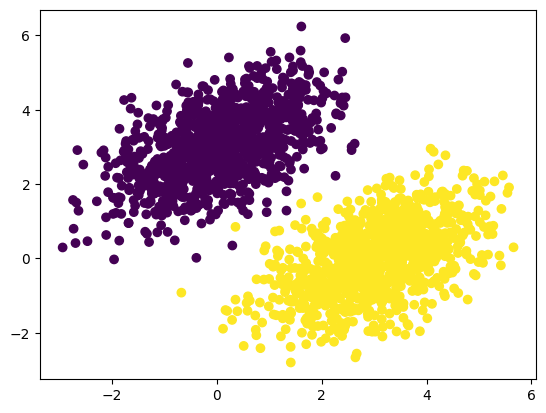

In [29]:
# Plotting the examples

plt.scatter(inputs[:, 0],
            inputs[:, 1],
            c=targets[:, 0])
plt.show()

#### Validation Data Preparation

In [31]:
# Generating random indices for shuffling the complete dataset
indices_permutation = np.random.permutation(len(inputs))
print(indices_permutation[:10],"\n")

# Selecting input and target based on the random indices
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

print(shuffled_inputs[:10])
print(shuffled_targets[:10])

[ 964  308 1060 1226  186  104 1555 1120 1339   68] 

[[-0.04314717  4.804092  ]
 [-0.9777816   3.2438953 ]
 [ 1.7890567  -1.3752275 ]
 [ 3.3369958   0.55426896]
 [-1.115207    3.3414268 ]
 [ 0.8780276   3.1226444 ]
 [ 3.2454596   0.7274504 ]
 [ 3.297895    2.1744335 ]
 [ 3.0571454   1.0126326 ]
 [-0.6250172   3.3635604 ]]
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [33]:
# length of the validation dataset
num_validation_samples = int(0.3 * len(inputs))
print(num_validation_samples, "\n")

# selecting data for validation
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
print(val_inputs[:5], "\n")
print(val_targets[:5], "\n")

# Selecting data for training
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
print(training_inputs[:5], "\n")
print(training_targets[:5], "\n")

600 

[[-0.04314717  4.804092  ]
 [-0.9777816   3.2438953 ]
 [ 1.7890567  -1.3752275 ]
 [ 3.3369958   0.55426896]
 [-1.115207    3.3414268 ]] 

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]] 

[[ 0.9856059   3.107589  ]
 [-0.0625847   4.2315984 ]
 [ 2.515049    0.8297901 ]
 [-0.34852594  1.9892151 ]
 [ 1.5689551  -0.62147254]] 

[[0.]
 [0.]
 [1.]
 [0.]
 [1.]] 



In [34]:
# Model
model = keras.Sequential(
    [
        keras.layers.Dense(1)
        ])

# Compile
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [35]:
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    
    # Using validation data
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5

88/88 [==============================] - 2s 7ms/step - loss: 0.3160 - binary_accuracy: 0.9771 - val_loss: 0.0354 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0711 - binary_accuracy: 0.9621 - val_loss: 0.0417 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0705 - binary_accuracy: 0.9629 - val_loss: 0.0799 - val_binary_accuracy: 0.9233
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0698 - binary_accuracy: 0.9614 - val_loss: 0.0374 - val_binary_accuracy: 0.9883
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0669 - binary_accuracy: 0.9629 - val_loss: 0.1542 - val_binary_accuracy: 0.7433


If you want to compute the validation loss and metrics after the training is complete, you can call the `evaluate()` method:

In [36]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
print(loss_and_metrics)

5/5 [==============================] - 0s 10ms/step - loss: 0.1542 - binary_accuracy: 0.7433
[0.15417931973934174, 0.7433333396911621]


**Inference**: Using a model after training

In [ ]:
# Some new input - Numpy array or dataset
new_inputs = ""

# returns a NumPy array
predictions = model.predict(new_inputs, batch_size=128)